# Beyond Girko's Law

1. V. L. Girko (1984). Circular law. Theory of Probability and Its Applications, 29(4), 694-706.
2. H. J. Sommers, A. Crisanti, H. Sompolinsky and Y. Stein (1988). [Spectrum of large random asymmetric matrices](http://pdfs.semanticscholar.org/978e/e44dd0292ddfdb745e03f26508b31df2c83b.pdf). Physical Review Letters, 60(19), 1895-1898.
3. J. Feinberg and A. Zee (1997). [Non-gaussian non-hermitian random matrix theory: phase transition and addition formalism](https://ac.els-cdn.com/S0550321397004197/1-s2.0-S0550321397004197-main.pdf?_tid=688e92ae-6a5b-4590-887a-5eedb2201d64&acdnat=1527079313_8960089921305ac393eb90ee8946e519). Nuclear Physics B, 501(3), 643-669.
4. J. Feinberg and A. Zee(1997). [Non-hermitian random matrix theory: method of hermitian reduction](https://ac.els-cdn.com/S0550321397005026/1-s2.0-S0550321397005026-main.pdf?_tid=d25fc151-c966-4703-9e05-ab6dbaf010a1&acdnat=1527079010_7043499b34f6d2482e70df18d26fa46c). Nuclear Physics B, 504(3), 579-608.
5. K. Rajan and L. F. Abbott (2006). [Eigenvalue spectra of random matrices for neural networks](http://genomics.princeton.edu/rajan/downloads/papers/Rajan_PRL_2006.pdf). Physical Review Letters, 97(18), 188104.

In [1]:
import numpy as np
import numpy.linalg as la
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

## 1 Girko's circular law

+ **Real**

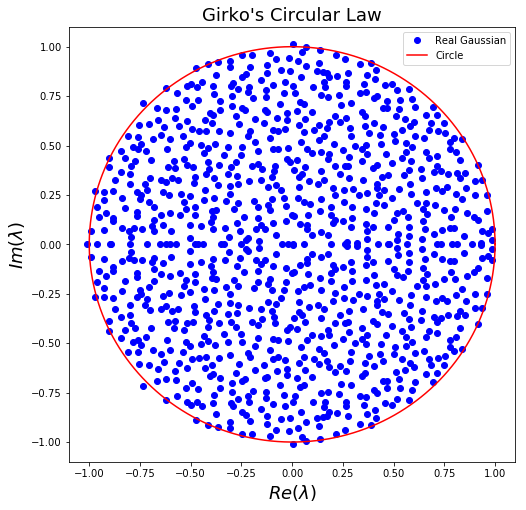

In [2]:
N = 1000
trials = 1
evs = []
for _ in range(trials):
    G = np.random.randn(N, N)
    G = G / np.sqrt(N)
    es = la.eigvals(G)
    for e in es:
        evs.append(e)
evs = np.array(evs)

dt = .005 * np.pi
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / dt))
x = np.cos(t)
y = np.sin(t)

plt.figure(figsize=(8, 8))
Gaussian, = plt.plot(evs.real, evs.imag, 'ob')
Circle, = plt.plot(x, y, 'r-')
plt.title('Girko\'s Circular Law', fontsize=18)
plt.xlabel(r'$Re(\lambda)$', fontsize=18)
plt.ylabel(r'$Im(\lambda)$', fontsize=18)
plt.legend(handles=[Gaussian, Circle], labels=['Real Gaussian', 'Circle'], loc='upper right')
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.show()

+ **Complex**

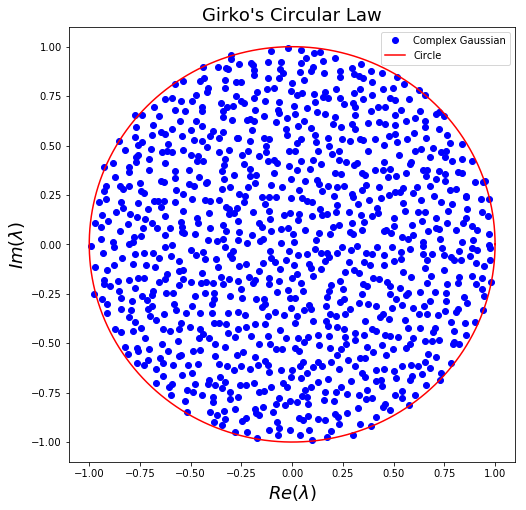

In [3]:
N = 1000
trials = 1
evs = []
for _ in range(trials):
    G = np.random.randn(N, N) + 1j * np.random.randn(N, N)
    G = G / np.sqrt(2 * N)
    es = la.eigvals(G)
    for e in es:
        evs.append(e)
evs = np.array(evs)

dt = .005 * np.pi
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / dt))
x = np.cos(t)
y = np.sin(t)

plt.figure(figsize=(8, 8))
Gaussian, = plt.plot(evs.real, evs.imag, 'ob')
Circle, = plt.plot(x, y, 'r-')
plt.title('Girko\'s Circular Law', fontsize=18)
plt.xlabel(r'$Re(\lambda)$', fontsize=18)
plt.ylabel(r'$Im(\lambda)$', fontsize=18)
plt.legend(handles=[Gaussian, Circle], labels=['Complex Gaussian', 'Circle'], loc='upper right')
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.show()

## 2 Column Sampling

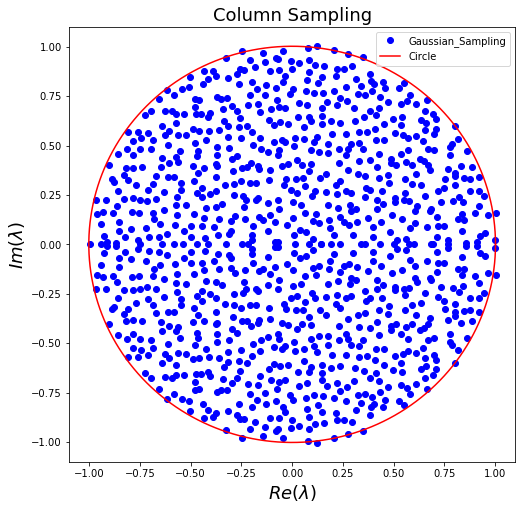

In [4]:
N = 1000
trials = 1
evs = []

f = 0.3
mu_E = 0.1
mu_I = f * mu_E / (f - 1)

for _ in range(trials):
    M = np.zeros((N, N))
    idxs = np.random.permutation(N)
    for i in range(int(f * N)):
        M[:, idxs[i]] = 1 / np.sqrt(N) * np.random.randn(N) + mu_E / np.sqrt(N)
    for j in range(int(f * N), N):
        M[:, idxs[j]] = 1 / np.sqrt(N) * np.random.randn(N) + mu_I / np.sqrt(N)
    es = la.eigvals(M)
    for e in es:
        evs.append(e)
evs = np.array(evs)

dt = .005 * np.pi
r = np.sqrt(1 + f * mu_E ** 2 + (1 - f) * mu_I ** 2)
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / dt))
x = r * np.cos(t)
y = r * np.sin(t)

plt.figure(figsize=(8, 8))
Gaussian_Sampling, = plt.plot(evs.real, evs.imag, 'ob')
Circle, = plt.plot(x, y, 'r-')
plt.title('Column Sampling', fontsize=18)
plt.xlabel(r'$Re(\lambda)$', fontsize=18)
plt.ylabel(r'$Im(\lambda)$', fontsize=18)
plt.legend(handles=[Gaussian_Sampling, Circle], labels=['Gaussian_Sampling', 'Circle'], loc='upper right')
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.show()

## 3 Ellipse via partial symmetry

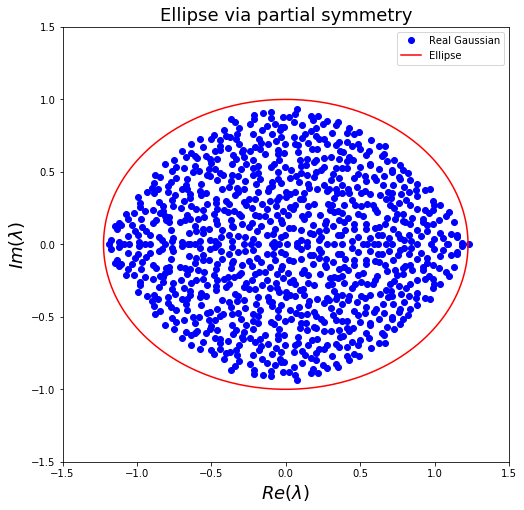

In [5]:
N = 1000
trials = 1
evs = []
for i in range(trials):
    G = np.random.randn(N, N)
    G = G / np.sqrt(N)
    idxs = np.random.permutation(N)
    ps = 350
    for j in range(ps):
        for k in range(ps):
            G[idxs[j], idxs[k]] = G[idxs[k], idxs[j]]
    es = la.eigvals(G)
    for e in es:
        evs.append(e)
evs = np.array(evs)

dt = .005 * np.pi
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / dt))
# by trial, polar parameters a and b may be derived theorically.
x = np.sqrt(1.5) * np.cos(t)
y = np.sin(t)

plt.figure(figsize=(8, 8))
Gaussian, = plt.plot(evs.real, evs.imag, 'ob')
Ellipse, = plt.plot(x, y, 'r-')
plt.title('Ellipse via partial symmetry', fontsize=18)
plt.xlabel(r'$Re(\lambda)$', fontsize=18)
plt.ylabel(r'$Im(\lambda)$', fontsize=18)
plt.legend(handles=[Gaussian, Ellipse], labels=['Real Gaussian', 'Ellipse'], loc='upper right')
plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.show()

## 4 Shift the outliers inside the unit circle 

+ by imposing a constraint: **different means** but **same variances**

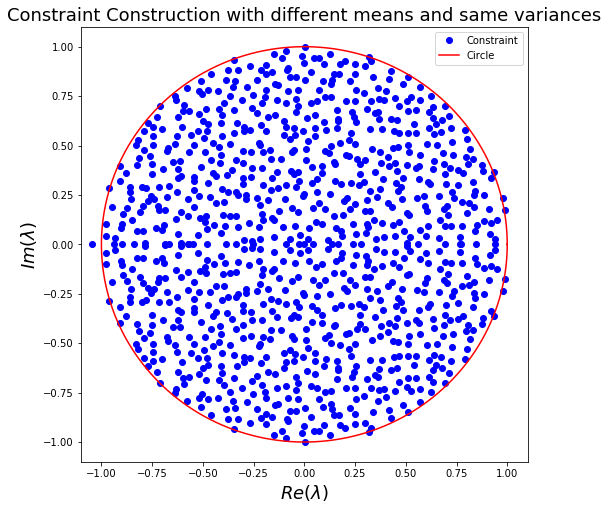

In [6]:
N = 1000
trials = 1
evs = []

f = 0.3
mu_E = 0.1
mu_I = f * mu_E / (f - 1)

for _ in range(trials):
    J = np.random.randn(N, N)
    J = J / np.sqrt(N)
    for i in range(N):
        J[i, :] = J[i, :] - np.mean(J[i, :])

    M = np.zeros((N, N))
    m = np.zeros(N)
    idxs = np.random.permutation(N)
    for i in range(int(f * N)):
        m[idxs[i]] = mu_E
    for j in range(int(f * N), N):
        m[idxs[j]] = mu_I
    for k in range(N):
        M[k, :] = 1 / np.sqrt(N) * m
    
    G = J + M 
    
    es = la.eigvals(G)
    for e in es:
        evs.append(e)
evs = np.array(evs)

dt = .005 * np.pi
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / dt))
x = np.cos(t)
y = np.sin(t)

plt.figure(figsize=(8, 8))
Constraint, = plt.plot(evs.real, evs.imag, 'ob')
Circle, = plt.plot(x, y, 'r-')
plt.title('Constraint Construction with different means and same variances', fontsize=18)
plt.xlabel(r'$Re(\lambda)$', fontsize=18)
plt.ylabel(r'$Im(\lambda)$', fontsize=18)
plt.legend(handles=[Constraint, Circle], labels=['Constraint', 'Circle'], loc='upper right')
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.show()

+ by imposing a constraint: **same means** but **different variances**

**Note**: no longer distributed **uniformly**

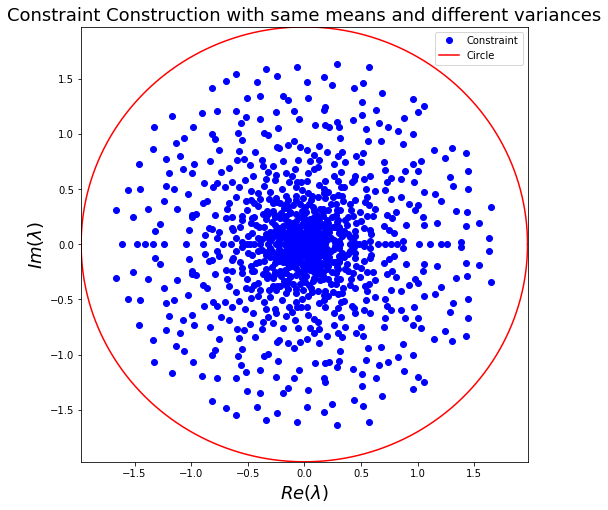

In [7]:
N = 1000
trials = 1
evs = []

f = 0.5
alpha = 0.06
mu_E = 0.1
mu_I = f * mu_E / (f - 1)

for _ in range(trials):
    J = np.random.randn(N, N)
    J = J / np.sqrt(N)
    
    X = np.zeros((N, N))
    sigma = np.random.rand(N)
    
    idxs = np.random.permutation(N)
    
    for j in range(int(f * N)):
        X[:, idxs[j]] = J[:, idxs[j]] * sigma[idxs[j]] / np.sqrt(alpha)
    
    for j in range(int(f * N), N):
        X[:, idxs[j]] = J[:, idxs[j]] * sigma[idxs[j]]
    
    es = la.eigvals(X)
    for e in es:
        evs.append(e)
evs = np.array(evs)

dt = .005 * np.pi
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / dt))
r = np.sqrt(1 - f + f / alpha)
x = (r - 1) * np.cos(t)
y = (r - 1) * np.sin(t)

plt.figure(figsize=(8, 8))
Constraint, = plt.plot(evs.real, evs.imag, 'ob')
Circle, = plt.plot(x, y, 'r-')
plt.title('Constraint Construction with same means and different variances', fontsize=18)
plt.xlabel(r'$Re(\lambda)$', fontsize=18)
plt.ylabel(r'$Im(\lambda)$', fontsize=18)
plt.legend(handles=[Constraint, Circle], labels=['Constraint', 'Circle'], loc='upper right')
plt.xlim((-(r - 1), r - 1))
plt.ylim((-(r - 1), r - 1))
plt.show()

## 5 Girko's Elliptic Law

[Boris Khoruzhenko](http://www.maths.qmul.ac.uk/~boris/): Non-Hermitian random matrices.

**Complex matrices**:

(1)
$$\tilde{J} = A + i v B,$$
(2)
$$J = \frac{A + i v B}{\sqrt{n}},$$
(3)
$$\tau = \frac{1 - v^2}{1 + v^2}.$$

+ if $\tau$ = 0, $\tilde{J}$ is Ginibre ensemble;
+ if $\tau$ = 1, $\tilde{J}$ is  GUE where $\tilde{J}$ = $J^{\tilde\ast}$;
+ if $\tau$ = -1, $\tilde{J}$ = - $J^{\tilde\ast}$.

**Two cases**: 

+ case 1: $n \rightarrow \infty$, v constant;
+ case 2: $n \rightarrow \infty$, $v^2 n \rightarrow$ constant, then we may think of eigenvalues of J as of perturbed eigenvalues of $\frac{A}{\sqrt{n}}$.

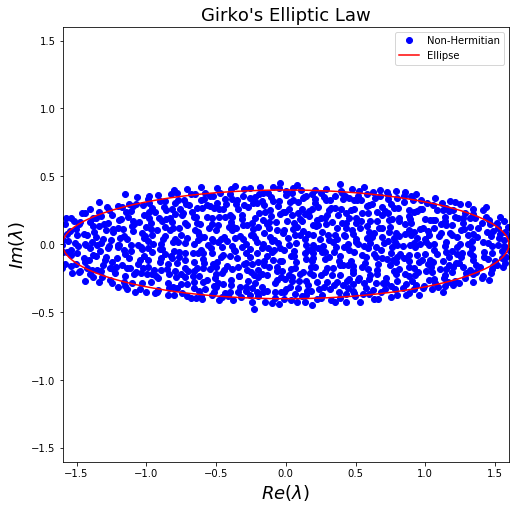

In [8]:
N = 1000
trials = 1
evs = []
v = 0.5
#v = 0.05
tau = (1 - v ** 2) / (1 + v ** 2)
for _ in range(trials):
    G1 = np.random.randn(N, N) + 1j * np.random.randn(N, N)
    G1 = np.mat(G1)
    A = (G1 + G1.H) / 2                         # GUE E(trA^2)=N^2 
    G2 = np.random.randn(N, N) + 1j * np.random.randn(N, N)
    G2 = np.mat(G2)
    B = (G2 + G2.H)/2                           # GUE E(trB^2)=N^2
    J = (A + 1j * v * B) / np.sqrt(N)     
    es = la.eigvals(J)
    for e in es:
        evs.append(e)
evs = np.array(evs)

dt = .005 * np.pi
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / dt))
x = (1 + tau) * np.cos(t)
y = (1 - tau) * np.sin(t)

plt.figure(figsize=(8, 8))
Gaussian, = plt.plot(evs.real, evs.imag, 'ob')
Elliptic, = plt.plot(x, y, 'r-')
plt.title('Girko\'s Elliptic Law', fontsize=18)
plt.xlabel(r'$Re(\lambda)$', fontsize=18)
plt.ylabel(r'$Im(\lambda)$', fontsize=18)
plt.legend(handles=[Gaussian, Elliptic], labels=['Non-Hermitian', 'Ellipse'], loc='upper right')
plt.xlim((-(1 + tau), 1 + tau))
plt.ylim((-(1 + tau), 1 + tau))
plt.show()

## 6 Simple Ring Law 

$$X = [x_1^T, \dots, x_N^T]$$

where $$x_i = [x_i^1, \dots, x_i^n]$$ 

for i $\in$ \{1, 2, $\dots$, n\}.

$$Y = \sqrt{S} U = \sqrt{\frac{1}{N} X X^H} U,$$

where U of size n $\times$ n is the **unitary Haar** matrix.

The n eigenvalues of the data matrix $\sqrt{S}$ are supported on the non-negative real axis. 

The n eigenvalues of the transformed matrix $Y$ are supported on the whole complex plane.

**Note**: **Circular Ensemble**(关于**圆系综**的性质以及在**Neural Networks**方面的应用, 以后抽时间再写)

$$A = U^T U$$

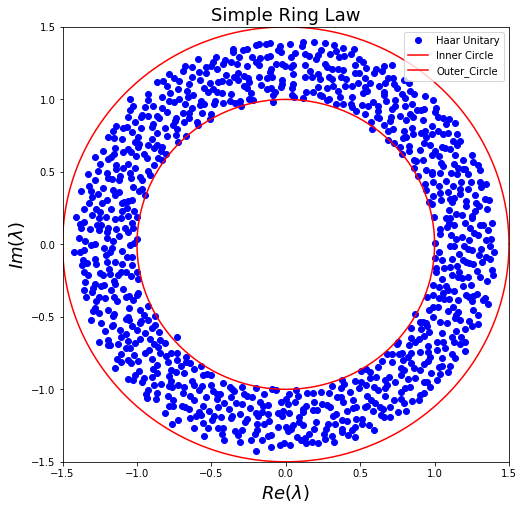

In [9]:
n = 1000
trials = 1
evs = []
c = 2 # fixed > 1
N = int(n * c)
for _ in range(trials):
    X = np.random.randn(n, N) + 1j * np.random.randn(n, N)      # if we use other stochastic matrix, outliers occur
    X = np.mat(X)
    S = 1. / N * np.dot(X, X.H)
    Q = la.qr(np.random.randn(n, n) + 1j * np.random.randn(n, n))[0]
    # R = la.qr(np.random.randn(n, n) + 1j * np.random.randn(n, n))[1]
    U = np.dot(Q, np.diag(np.exp(2 * np.pi * 1j * np.random.rand(n))))  # Haar unitary matrix
    # U = np.dot(Q, np.diag(np.sign(np.diag(R))))
    # 注意, 这里sqrtm是矩阵开根号运算, 即A = sqrtm(S), 保证A*A.T = S. 针对矩阵操作还有logm, expm等。
    Y = np.dot(sqrtm(S), U)
    es = la.eigvals(Y)
    for e in es:
        evs.append(e)
evs = np.array(evs)

dt = .005 * np.pi
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / dt))
# 具体公式请查找文献后自行推导
x1 = np.cos(t)
y1 = np.sin(t)
x2 = (1 + 1. / c) * np.cos(t)
y2 = (1 + 1. / c) * np.sin(t)


plt.figure(figsize=(8, 8))
Haar_Unitary, = plt.plot(evs.real, evs.imag, 'ob')
Inner_Circle, = plt.plot(x1, y1, 'r-')
Outer_Circle, = plt.plot(x2, y2, 'r-')
plt.title('Simple Ring Law', fontsize=18)
plt.xlabel(r'$Re(\lambda)$', fontsize=18)
plt.ylabel(r'$Im(\lambda)$', fontsize=18)
plt.legend(handles=[Haar_Unitary, Inner_Circle, Outer_Circle], labels=['Haar Unitary', 'Inner Circle', 'Outer_Circle'], loc='upper right')
plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.show()